In [229]:

import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import scipy.constants as constants
import plotly.io as pio

pio.renderers.default = "notebook"

In [230]:
# Data 
planets = pd.read_csv('./data/planets.csv')
distances_planets_ls = planets['Distance from Sun (10^6 km)'] * pow(10,9) / constants.speed_of_light # distance to sun to m

In [231]:
def spheres(size, clr, dist=0): 
    
    # Set up 100 points. First, do angles
    theta = np.linspace(0,2*np.pi,100)
    phi = np.linspace(0,np.pi,100)
    
    # Set up coordinates for points on the sphere
    x0 = dist + size * np.outer(np.cos(theta),np.sin(phi))
    y0 = size * np.outer(np.sin(theta),np.sin(phi))
    z0 = size * np.outer(np.ones(100),np.cos(phi))
    
    # Set up trace
    trace= go.Surface(x=x0, y=y0, z=z0, colorscale=[[0,clr], [1,clr]])
    trace.update(showscale=False)

    return trace

def orbits(dist, offset=0, clr='white', wdth=2): 
    
    # Initialize empty lists for each set of coordinates
    xcrd=[]
    ycrd=[]
    zcrd=[]
    
    # Calculate coordinates
    for i in range(0,361):
        xcrd=xcrd+[(round(np.cos(math.radians(i)),5)) * dist + offset]
        ycrd=ycrd+[(round(np.sin(math.radians(i)),5)) * dist]
        zcrd=zcrd+[0]
    
    trace = go.Scatter3d(x=xcrd, y=ycrd, z=zcrd, marker=dict(size=0.1), line=dict(color=clr,width=wdth))
    return trace


def annot(xcrd, zcrd, txt, xancr='center'):
    strng=dict(showarrow=False, x=xcrd, y=0, z=zcrd, text=txt, xanchor=xancr, font=dict(color='white',size=12))
    return strng

# Note, true diameter of the Sun is 1,392,700km. Reduced it for better visualization
diameter_km = [200000, 4878, 12104, 12756, 6787, 142796, 120660, 51118, 48600]
# Modify planet sizes making them retative to the Earth size, where Earth in this case = 2
diameter = [((i / 12756) * 2) for i in diameter_km]
# Distance from the sun expressed in millions of km
distance_from_sun = [0, 57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1]

# Create spheres for the Sun and planets
trace0=spheres(diameter[0], '#ffff00', distance_from_sun[0]) # Sun
trace1=spheres(diameter[1], planets.iloc[0,1], distance_from_sun[1]) # Mercury
trace2=spheres(diameter[2], planets.iloc[1,1], distance_from_sun[2]) # Venus
trace3=spheres(diameter[3], planets.iloc[2,1], distance_from_sun[3]) # Earth
trace4=spheres(diameter[4], planets.iloc[3,1], distance_from_sun[4]) # Mars
trace5=spheres(diameter[5], planets.iloc[4,1], distance_from_sun[5]) # Jupyter
trace6=spheres(diameter[6], planets.iloc[5,1], distance_from_sun[6]) # Saturn
trace7=spheres(diameter[7], planets.iloc[6,1], distance_from_sun[7]) # Uranus
trace8=spheres(diameter[8], planets.iloc[7,1], distance_from_sun[8]) # Neptune

# Set up orbit traces
trace11 = orbits(distance_from_sun[1]) # Mercury
trace12 = orbits(distance_from_sun[2]) # Venus
trace13 = orbits(distance_from_sun[3]) # Earth
trace14 = orbits(distance_from_sun[4]) # Mars
trace15 = orbits(distance_from_sun[5]) # Jupyter
trace16 = orbits(distance_from_sun[6]) # Saturn
trace17 = orbits(distance_from_sun[7]) # Uranus
trace18 = orbits(distance_from_sun[8]) # Neptune

# Use the same to draw a few rings for Saturn
trace21 = orbits(23, distance_from_sun[6], '#827962', 3) 
trace22 = orbits(24, distance_from_sun[6], '#827962', 3) 
trace23 = orbits(25, distance_from_sun[6], '#827962', 3)
trace24 = orbits(26, distance_from_sun[6], '#827962', 3) 
trace25 = orbits(27, distance_from_sun[6], '#827962', 3) 
trace26 = orbits(28, distance_from_sun[6], '#827962', 3)

layout1=go.Layout(showlegend=False, margin=dict(l=0, r=0, t=10, b=0),
                  paper_bgcolor = '#181818',
                  scene = dict(xaxis=dict(title='Distance from the Sun', 
                                          titlefont_color='black', 
                                          range=[-7000,7000], 
                                          backgroundcolor='#181818',
                                          color='black',
                                          showgrid=False,
                                          visible= True
                                        #   gridcolor='black'
                                          ),
                               yaxis=dict(title='Distance from the Sun',
                                          titlefont_color='black',
                                          range=[-7000,7000],
                                          backgroundcolor='#181818',
                                          color='black',
                                          showgrid=False,
                                          visible= False                                      
                                        #   gridcolor='black'
                                          ),
                               zaxis=dict(title='', 
                                          range=[-7000,7000],
                                          backgroundcolor='#181818',
                                          color='white', 
                                          showgrid=False,
                                          visible= False
                                        #   gridcolor='black'
                                         ),
                               annotations=[
                                   annot(distance_from_sun[0], 40, 'Sun', xancr='left'),
                                   annot(distance_from_sun[1], 5, 'Mercury'),
                                   annot(distance_from_sun[2], 9, 'Venus'),
                                   annot(distance_from_sun[3], 9, 'Earth'),
                                   annot(distance_from_sun[4], 7, 'Mars'),
                                   annot(distance_from_sun[5], 30, 'Jupyter'),
                                   annot(distance_from_sun[6], 28, 'Saturn'),
                                   annot(distance_from_sun[7], 20, 'Uranus'),
                                   annot(distance_from_sun[8], 20, 'Neptune'),
                                   ]
                               ))
fig1 = go.Figure(data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8,
                        trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18,
                        trace21, trace22, trace23, trace24, trace25, trace26],
                layout = layout1)


## Is Earth a planet?
Our planet is such a big place, isn't it?

Well, it depends on what it is compared to.
Technically, Earth is considered a dwarf-planet, not a planet.

In [232]:
#| fig-cap: "Fig1: Solar System Sketch. Inspired by [@solarsystemplot]"

# default = 'eye = (x:2, y:2, z:0.1)'
camera = dict(
 # intro view
    eye=dict(x=-0.03, y=-0.05, z=0.01),
    center=dict(x=1, y=0.5, z=0)
)
fig1.update_layout(scene_camera=camera)
fig1.show()


## Everything around us is huge!
The Sun's diameter is so large (1,392,700km) that had to be scaled down for it to fit in your screen. The Sun in this visualisation is 1/7 times compared to the planets!

The Solar System is so big that kilometers are not very useful anymore. For the rest of our journey, we will be measuring distances with help of the speed of light (aprox 300.000 km/s)


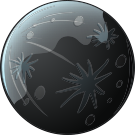
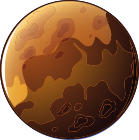
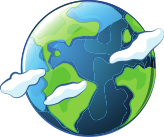
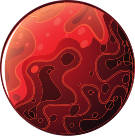
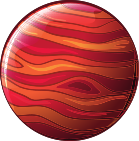
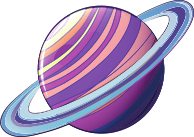
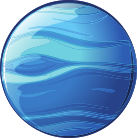
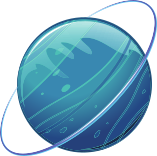

In [237]:
#| fig-cap: "Fig2: Average planet temperatures"
from PIL import Image
import plotly.express as px
planets = pd.read_csv('./data/planets.csv')
fig2 = px.scatter(
    planets,
    x='lightspeed (s)',
    y='Mean Temperature (C)',
    hover_name="Planet",
    custom_data=["Mean Temperature (C)","Time from Sun"]
)

# here water is vapor
fig2.add_shape(
    type='rect',
    x0=15900,
    y0=120,
    x1=16500,
    y1=600,
    line=dict(color='tomato'),
    fillcolor='tomato',
    opacity=1,
    layer="below"
)
fig2.add_annotation(
    x=16200,
    y=350,
    text='TOO HOT',
    showarrow=False,
    font=dict(color='black', size=20),
    textangle=270 
)

# here water is just right
fig2.add_shape(
    type='rect',
    x0=-200,
    y0=-15,
    x1=16500,
    y1=115,
    line=dict(color='lightgreen'),
    fillcolor='lightgreen',
    opacity=1,
    layer="below"
)
fig2.add_annotation(
    x=8000,
    y=50,
    text='Just Right!',
    showarrow=False,
    font=dict(color='#181818', size=20)
)

# here water is frozen
fig2.add_shape(
    type='rect',
    x0=15900,
    y0=-400,
    x1=16500,
    y1=-20,
    line=dict(color='lightblue'),
    fillcolor='lightblue',
    opacity=1,
    layer="below"
)
fig2.add_annotation(
    x=16200,
    y=-150,
    text='TOO COLD',
    showarrow=False,
    font=dict(color='black', size=20),
    textangle=270 
)


fig2.update_traces(marker_color="rgba(0,0,0,0)")

for i, row in planets.iterrows():
    fig2.add_layout_image(
        dict(
            source=Image.open("./icons/" + row["Planet"] + ".png"),
            xref="x",
            yref="y",
            xanchor="center",
            yanchor="middle",
            x=row["lightspeed (s)"],
            y=row["Mean Temperature (C)"],
            sizex=1000,
            sizey=1000,
            sizing="contain",
            opacity=0.8,
            layer="above"
        )
    )

fig2.update_layout(height=800,
                   yaxis_range=[-300, 600],
                   plot_bgcolor="#181818",
                   paper_bgcolor="#181818",
                   xaxis_title='Distance from the Sun at lightspeed (seconds)')
fig2.update_xaxes(
    showline=False,
    showgrid=False,
    title="Time from the Sun travelling at the speed of light",
    zeroline=False,
    tickfont=dict(color='#181818'),
    titlefont=dict(color='white')
)
fig2.update_yaxes(
    ticks='inside',
    tickfont=dict(color='white'),
    title="Planet mean temperature (°C)",
    showline=True,
    linecolor='#ffff00',
    showgrid=False,
    zeroline=False,
    titlefont=dict(color='white')
)

fig2.update_traces(hovertemplate="%{hovertext}<br>Mean Temp: %{customdata[0]} °C <br>Time from Sun: %{customdata[1]}")

fig2.show()

In [228]:
# distances_planets_ls


## Earth is a comfortable place (temps, year length, distances)

## Size and composition of planets depending on distance (size, composition, gravity pull)

## Comparison Other goldilocks discovered (distances, temps too cold / hot)

[@solarsystemsizes]